In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import subprocess

# Week2: EDA and understanding allele frequencies in the genome

command for plink to get the allele frequencies:

`./plink2 --bfile ./LDREF/1000G.EUR.1 --make-bed --out chromosome1`

In [2]:
df1 = pd.read_csv('./allele_freq/chromosome1.afreq', delim_whitespace=True)

In [3]:
df1

,#CHROM,ID,REF,ALT,PROVISIONAL_REF?,ALT_FREQS,OBS_CT
0,1,rs3094315,A,G,Y,0.163599,978
1,1,rs3131972,G,A,Y,0.164622,978
2,1,rs3131969,G,A,Y,0.130879,978
3,1,rs1048488,T,C,Y,0.163599,978
4,1,rs3115850,C,T,Y,0.164622,978
...,...,...,...,...,...,...,...
98637,1,rs4926502,G,A,Y,0.020450,978
98638,1,rs6704311,G,A,Y,0.054192,978
98639,1,rs34013644,T,C,Y,0.037832,978
98640,1,rs12746903,T,C,Y,0.007157,978


In [4]:
common_alleles = df1[df1['ALT_FREQS'] > 0.05].shape[0]/df1.shape[0]
common_alleles

0.8931996512641673

In [5]:
low_frequency = df1[(df1['ALT_FREQS'] > 0.01) & (df1['ALT_FREQS'] <= 0.05)].shape[0]/df1.shape[0]
low_frequency

0.09428032683846638

In [6]:
rare_alleles = df1[df1['ALT_FREQS'] <= 0.01].shape[0]/df1.shape[0]
rare_alleles

0.012520021897366233

In [7]:
expression_df = pd.read_csv('GD462.GeneQuantRPKM.50FN.samplename.resk10.txt', delim_whitespace=True)
expression_df

,TargetID,Gene_Symbol,Chr,Coord,HG00096,HG00097,HG00099,HG00100,HG00101,HG00102,...,NA20810,NA20811,NA20812,NA20813,NA20814,NA20815,NA20816,NA20819,NA20826,NA20828
0,ENSG00000152931.6,ENSG00000152931.6,5,59783540,0.101858,0.078110,0.048981,0.118597,0.004035,0.010925,...,0.088601,0.240010,0.137175,0.148494,0.038643,0.088509,0.029204,0.024423,0.044816,0.139186
1,ENSG00000183696.9,ENSG00000183696.9,7,48128225,8.183805,5.686911,2.434653,3.830894,6.612288,4.709646,...,13.428205,6.094500,12.536000,2.217262,3.573394,7.583364,4.052882,1.570378,4.900372,6.737308
2,ENSG00000139269.2,ENSG00000139269.2,12,57846106,1.199910,1.573572,0.521616,1.447225,3.565791,1.982681,...,3.225880,1.996067,2.854923,2.267343,1.331201,2.187895,1.004250,3.003316,1.984362,1.684954
3,ENSG00000169129.8,ENSG00000169129.8,10,116164515,0.831940,0.069778,0.931086,0.620941,1.660668,0.570481,...,1.023381,1.127852,0.774409,1.495854,0.895342,1.513521,0.826377,1.021201,0.952502,0.740565
4,ENSG00000134602.11,ENSG00000134602.11,X,131157293,27.646422,24.395572,16.445374,24.806650,25.113349,19.233988,...,25.079490,28.725528,24.450520,27.264069,26.912814,29.509210,26.462331,25.624009,25.707741,22.824957
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23717,ENSG00000235472.1,ENSG00000235472.1,13,29172970,31.582832,34.071123,19.394365,37.523721,33.430473,37.844966,...,47.905182,33.224977,39.827675,27.096811,34.686342,37.386766,30.598840,33.516674,32.017940,38.341888
23718,ENSG00000114423.14,ENSG00000114423.14,3,105588396,14.054749,14.477899,11.584425,12.637956,12.015089,13.750655,...,11.723462,9.900372,10.473115,13.433413,15.832594,19.216176,10.213739,14.563192,15.637732,8.357117
23719,ENSG00000243312.2,ENSG00000243312.2,4,87791344,1.112114,0.831797,0.253228,0.271568,0.486086,1.362640,...,1.168991,0.645389,0.819469,0.515448,0.463054,1.580658,0.701396,0.771233,0.857330,0.703369
23720,ENSG00000257337.1,ENSG00000257337.1,12,53448222,3.826396,6.045798,2.593872,4.447169,5.294657,4.106823,...,6.524398,6.017795,3.460273,3.905032,5.023161,5.333027,5.694370,8.142939,5.622043,6.026476


In [8]:
expression_df.shape

(23722, 466)

Each row is a gene, each column represents a person

# Week3: Performing an eQTL on one gene

In [9]:
fam_df = pd.read_csv('./LDREF/1000G.EUR.1.fam', delim_whitespace=True, header=None)
fam_df.columns = ['FID', 'IID', 'Father', 'Mother', 'Sex', 'Phenotype']
gen_ids = fam_df['IID'].tolist()
len(gen_ids)

489

In [10]:
exp_ids = expression_df.columns[4:].tolist()
len(exp_ids)

462

In [11]:
common_ids = set(gen_ids).intersection(exp_ids)

In [12]:
overlap = len(common_ids)
overlap

344

## eQTL Analysis: associating genotype and gene expression

In [13]:
annotations = pd.read_csv('gene_annot.txt', delim_whitespace=True)
annotations

,ID,CHR,START,STOP,SYM,TYPE
0,DDX11L1,1,11868,13052,ENSG00000223972,transcribed_unprocessed_pseudogene
1,OR4F5,1,69090,70008,ENSG00000186092,protein_coding
2,FAM87B,1,817370,819834,ENSG00000177757,lincRNA
3,LINC00115,1,826205,827522,ENSG00000225880,lincRNA
4,LINC01128,1,827607,859446,ENSG00000228794,processed_transcript
...,...,...,...,...,...,...
20495,ARSA,22,50622753,50628179,ENSG00000100299,protein_coding
20496,SHANK3,22,50674414,50733298,ENSG00000251322,protein_coding
20497,ACR,22,50738195,50745334,ENSG00000100312,protein_coding
20498,RPL23AP82,22,50756947,50801309,ENSG00000184319,transcribed_unprocessed_pseudogene


In [14]:
gene_of_interest = 'PKP3'

In [15]:
fam11 = pd.read_csv('./LDREF/1000G.EUR.11.fam', delim_whitespace=True, header=None)
fam11

,0,1,2,3,4,5
0,HG00096,HG00096,0,0,0,-9
1,HG00097,HG00097,0,0,0,-9
2,HG00099,HG00099,0,0,0,-9
3,HG00101,HG00101,0,0,0,-9
4,HG00102,HG00102,0,0,0,-9
...,...,...,...,...,...,...
484,NA20822,NA20822,0,0,0,-9
485,NA20826,NA20826,0,0,0,-9
486,NA20827,NA20827,0,0,0,-9
487,NA20828,NA20828,0,0,0,-9


In [16]:
gene = annotations[annotations['ID'] == gene_of_interest]
gene

,ID,CHR,START,STOP,SYM,TYPE
11003,PKP3,11,392613,404908,ENSG00000184363,protein_coding


In [17]:
gene_id = gene['SYM']

In [18]:
chromosome = 'chr' + str(gene['CHR'].values[0])
start = gene['START'].values[0]
stop = gene['STOP'].values[0]

In [19]:
range_start = max(0, (start-500000))
range_end = stop+500000

In [20]:
my_coord_line = f"{chromosome}\t{range_start}\t{range_end}\t{gene_of_interest}\t0\t+\n"
with open('my_coord.txt', 'w') as f:
    f.write(my_coord_line)

In [21]:
gene_id

11003    ENSG00000184363
Name: SYM, dtype: object

Get the SNPs within +/- 500kb with the start and stop of the gene:

`./plink2 --bfile ./LDREF/1000G.EUR.11 --extract bed1 my_coord.txt --out 1000G.EUR.11.GeneX --make-bed`

In [22]:
exp_levels = expression_df[expression_df['TargetID'].str.split('.').apply(lambda x: x[0]) == gene_id.values[0]]

In [23]:
exp = exp_levels.iloc[:,4:].transpose()
exp

,16840
HG00096,0.004377
HG00097,-0.000609
HG00099,0.025808
HG00100,0.006876
HG00101,0.009132
...,...
NA20815,0.070120
NA20816,0.077709
NA20819,0.045336
NA20826,0.003922


Convert the genotype data into a csv:

`./plink2 --bfile 1000G.EUR.11.GeneX --export A --out genotype_data`

In [24]:
genotype_df = pd.read_csv('genotype_data.raw', sep='\t')
genotype_df

,FID,IID,PAT,MAT,SEX,PHENOTYPE,rs3802985_C,rs3741411_G,rs11602954_G,rs2280543_C,...,rs12416812_A,rs7940112_T,rs7121173_G,rs6597973_C,rs4963183_T,rs7946095_T,rs4963129_G,rs4963179_C,rs11246340_G,rs12799186_A
0,HG00096,HG00096,0,0,0,-9,2,2,2,2,...,2,0,2,2,2,2,2,2,1,2
1,HG00097,HG00097,0,0,0,-9,2,2,0,2,...,1,1,1,1,1,2,2,1,2,1
2,HG00099,HG00099,0,0,0,-9,2,1,1,2,...,0,2,0,0,0,2,2,0,2,0
3,HG00101,HG00101,0,0,0,-9,2,1,1,2,...,1,1,1,1,1,2,2,1,2,1
4,HG00102,HG00102,0,0,0,-9,2,2,1,2,...,1,1,1,1,1,2,2,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
484,NA20822,NA20822,0,0,0,-9,2,2,2,2,...,2,0,2,2,2,2,2,2,2,2
485,NA20826,NA20826,0,0,0,-9,2,2,1,2,...,1,1,1,1,1,2,2,1,2,1
486,NA20827,NA20827,0,0,0,-9,2,2,2,2,...,1,1,1,1,1,2,2,1,1,1
487,NA20828,NA20828,0,0,0,-9,2,1,2,2,...,1,1,1,1,1,2,2,1,2,1


In [25]:
genotype_df.set_index('IID', inplace=True)

In [26]:
common_samples = exp.index.intersection(genotype_df.index)
exp_df = exp.loc[common_samples]
gen_df = genotype_df.loc[common_samples]

In [27]:
results = []
y = exp_df.iloc[:, 0].values 

for snp in genotype_df.columns[5:]:
    X = gen_df[[snp]]
    slope, intercept, r_value, p_value, std_error = stats.linregress(X.squeeze(), y)
    results.append({'SNP': snp, 'beta_0': intercept, 'beta_1': slope, 'R_sq': (r_value**2), 'Standard Error': std_error,'P-value': p_value})

results_df = pd.DataFrame(results)
results_df

,SNP,beta_0,beta_1,R_sq,Standard Error,P-value
0,rs3802985_C,0.029236,-0.004256,0.000672,0.008878,0.631939
1,rs3741411_G,0.018118,0.001684,0.000971,0.002920,0.564557
2,rs11602954_G,0.020607,0.000161,0.000012,0.002557,0.949841
3,rs2280543_C,0.017832,0.001559,0.000159,0.006677,0.815496
4,rs2280544_C,0.015214,0.003846,0.006676,0.002537,0.130415
...,...,...,...,...,...,...
375,rs7946095_T,0.023899,-0.001700,0.000679,0.003526,0.629981
376,rs4963129_G,0.023899,-0.001700,0.000679,0.003526,0.629981
377,rs4963179_C,0.022392,-0.001406,0.001185,0.002207,0.524498
378,rs11246340_G,0.011847,0.005420,0.010524,0.002842,0.057329


### locusZoom Plot

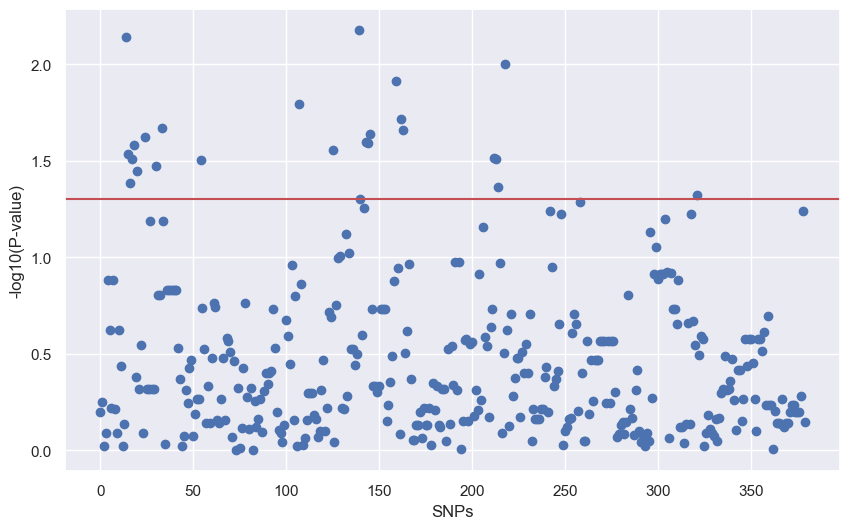

In [28]:
sns.set(font_scale=1)
plt.figure(figsize=(10, 6))
plt.scatter(results_df.index, -np.log10(results_df['P-value']))
plt.axhline(y=-np.log10(0.05), color='r', linestyle='-') 
plt.xlabel('SNPs')
plt.ylabel('-log10(P-value)')
plt.show()

# Week4

## cis-eQTL for chromosome 12

In [29]:
chromosome12 = annotations[annotations['CHR'] == 12]

In [30]:
chromosome12

,ID,CHR,START,STOP,SYM,TYPE
12327,FAM138D,12,36601,38133,ENSG00000249054,lincRNA
12328,IQSEC3,12,66764,178460,ENSG00000120645,protein_coding
12329,SLC6A12,12,190076,214523,ENSG00000111181,protein_coding
12330,SLC6A13,12,220622,262873,ENSG00000010379,protein_coding
12331,KDM5A,12,280128,388530,ENSG00000073614,protein_coding
...,...,...,...,...,...,...
13417,ZNF140,12,133079837,133107544,ENSG00000196387,protein_coding
13418,ZNF891,12,133118153,133130473,ENSG00000214029,protein_coding
13419,ZNF10,12,133139198,133144966,ENSG00000256223,protein_coding
13420,ZNF268,12,133181408,133184759,ENSG00000090612,protein_coding


In [31]:
chromosome = 'chr12'
gene_snps = []
for i, gene in chromosome12.iterrows():
    start = gene['START']
    end = gene['STOP']
    range_start = max(0, (start-500000))
    range_end = end + 500000
    gene_snps.append({'chromosome': chromosome, 'start': range_start, 'end': range_end, 'gene': gene['ID'], " ": 0, '': '+' })

In [32]:
chr12 = pd.DataFrame(gene_snps)

In [33]:
errors = []
successes = []
for _, row in chr12.iterrows():
    chrom = row['chromosome']
    start = row['start']
    end = row['end']
    gene = row['gene']
    
    bfile_prefix = "./LDREF/1000G.EUR.12" 
    coord_filename = f"./coords_12/{gene}_coord.txt"
    with open(coord_filename, "w") as coord_file:
        coord_file.write(f"{chrom}\t{start}\t{end}\t{gene}\t0\t+")
    output_prefix = f"./LDREF_12/1000G.EUR.12.{gene}"
    
    command = [
        "./plink2", 
        "--bfile", "./LDREF/1000G.EUR.12", 
        "--extract", "bed1", coord_filename,
        "--out", output_prefix,
        "--make-bed"
    ]
    try:
        result = subprocess.run(command, check=True, capture_output=True, text=True)
        successes.append(gene)
    except subprocess.CalledProcessError as e:
        errors.append(gene)

In [34]:
expression_df_12  = expression_df[expression_df['Chr'] == '12']

In [35]:
for gene in chr12['gene'].values:
    command = [
        "./plink2",
        "--bfile",
        f"./LDREF_12/1000G.EUR.12.{gene}",
        "--export", 
        "A",
        "--out",
        f"./genotypes_raw/genotype_data_{gene}"
    ]
    try:
        result = subprocess.run(command, check=True, capture_output=True, text=True)
    except subprocess.CalledProcessError as e:
        pass

In [36]:
gene = successes[2]
gene_id = annotations[annotations['ID'] == gene]['SYM']
exp = expression_df_12[expression_df_12['TargetID'].str.split('.').apply(lambda x: x[0]) == gene_id.values[0]]
exp_df = exp.iloc[:,4:].transpose()
exp_df

,11148
HG00096,0.044302
HG00097,-0.025471
HG00099,0.017308
HG00100,0.072303
HG00101,0.032021
...,...
NA20815,0.302497
NA20816,0.016835
NA20819,0.051527
NA20826,0.034566


In [37]:
results = []
total = 0
total2 = 0
for gene in successes:
    gene_id = annotations[annotations['ID'] == gene]['SYM']
    if gene not in successes:
        total+=1
        continue
    exp = expression_df_12[expression_df_12['TargetID'].str.split('.').apply(lambda x: x[0]) == gene_id.values[0]]
    if exp.shape[0] == 0:
        total2+=1
        continue
        
    exp_df = exp.iloc[:,4:].transpose()
    
    gen_df = pd.read_csv(f"./genotypes_raw/genotype_data_{gene}.raw", sep='\t')
    gen_df.set_index('IID', inplace=True)

    common_samples = exp_df.index.intersection(gen_df.index)
    exp_df = exp_df.loc[common_samples]
    gen_df = genotype_df.loc[common_samples]

    y = exp_df.iloc[:, 0].values
    X = gen_df.loc[common_samples].iloc[:, 5:]
    for snp in X.columns:
        slope, intercept, r_value, p_value, std_error = stats.linregress(X[[snp]].squeeze(), y)
        results.append({'Gene': gene, 'SNP': snp, 'beta_0': intercept, 'beta_1': slope, 'R_sq': (r_value**2), 'Standard Error': std_error,'P-value': p_value})    

In [38]:
results_df = pd.DataFrame(results)

In [39]:
results_df

,Gene,SNP,beta_0,beta_1,R_sq,Standard Error,P-value
0,SLC6A12,rs3802985_C,0.099090,0.002303,1.113461e-05,0.037318,0.950830
1,SLC6A12,rs3741411_G,0.096695,0.004255,3.512311e-04,0.012276,0.729071
2,SLC6A12,rs11602954_G,0.100166,0.002206,1.232280e-04,0.010744,0.837458
3,SLC6A12,rs2280543_C,0.118436,-0.007629,2.161466e-04,0.028055,0.785851
4,SLC6A12,rs2280544_C,0.102637,0.000672,1.152874e-05,0.010695,0.949969
...,...,...,...,...,...,...,...
298675,ZNF268,rs7946095_T,4.261798,0.141461,1.800800e-03,0.180094,0.432714
298676,ZNF268,rs4963129_G,4.261798,0.141461,1.800800e-03,0.180094,0.432714
298677,ZNF268,rs4963179_C,4.513848,0.000782,1.404597e-07,0.112861,0.994474
298678,ZNF268,rs11246340_G,4.535625,-0.012584,2.171840e-05,0.146013,0.931370


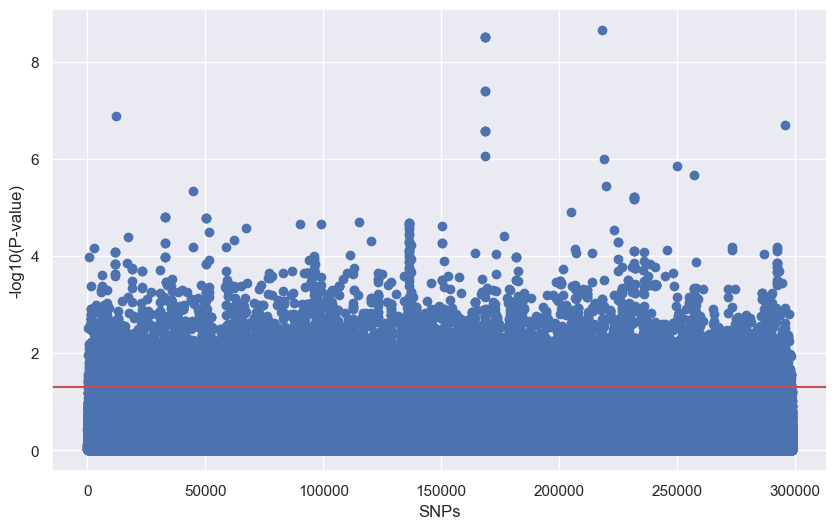

In [40]:
sns.set(font_scale=1)
plt.figure(figsize=(10, 6))
plt.scatter(results_df.index, -np.log10(results_df['P-value']))
plt.axhline(y=-np.log10(0.05), color='r', linestyle='-') 
plt.xlabel('SNPs')
plt.ylabel('-log10(P-value)')
plt.show()

Generally, we do not plot the cis-eQTL like this, but rather, would filter by gene and plot onlthe the SNPs and p-values for that gene.

## Clumping

### Step1: Randomly sample 80% of individuals and perform the cis-eQTL analysis for one gene

In [41]:
fam12 = pd.read_csv('./LDREF/1000G.EUR.12.fam', header=None, delim_whitespace=True)
ids = fam12.iloc[:,0:2]
ids

,0,1
0,HG00096,HG00096
1,HG00097,HG00097
2,HG00099,HG00099
3,HG00101,HG00101
4,HG00102,HG00102
...,...,...
484,NA20822,NA20822
485,NA20826,NA20826
486,NA20827,NA20827
487,NA20828,NA20828


In [42]:
samples = np.array(expression_df.iloc[:, 4:].columns)
len(samples)

462

In [43]:
train, test = train_test_split(ids, test_size=0.2, random_state=42)

In [44]:
pd.DataFrame(train).to_csv("sample_ids.txt", sep=" ", index=False, header=False)

In [45]:
gene_of_interest = 'LAG3'

In [46]:
gene = annotations[annotations['ID'] == gene_of_interest]
gene_id = gene['SYM']

In [47]:
chromosome = "chr12"
start = gene['START'].values[0]
stop = gene['STOP'].values[0]

range_start = max(0, start-500000)
range_end = stop+500000

my_coord_line = f"{chromosome}\t{range_start}\t{range_end}\t{gene_of_interest}\t0\t+"
with open('my_coord_12.txt', 'w') as f:
    f.write(my_coord_line)

In [48]:
exp_levels = expression_df[expression_df['TargetID'].str.split('.').apply(lambda x: x[0]) == gene_id.values[0]]
exp_levels = exp_levels.iloc[:,4:].transpose()
exp_levels

,23621
HG00096,0.641109
HG00097,5.434203
HG00099,2.005688
HG00100,4.613355
HG00101,7.323533
...,...
NA20815,5.562732
NA20816,2.283815
NA20819,7.335967
NA20826,13.106804


Run this in plink2 to get the SNPs for just these samples

`./plink2 --bfile ./LDREF/1000G.EUR.12 --extract bed1 my_coord_12.txt --keep sample_ids.txt --out 1000G.EUR.12.LAG3 --make-bed`

In [49]:
command = [
    './plink2', '--bfile', './LDREF/1000G.EUR.12', '--extract',
    'bed1', 'my_coord_12.txt', '--keep', 'sample_ids.txt', '--out', '1000G.EUR.12.LAG3', '--make-bed'
]

try:
    result = subprocess.run(command, check=True, capture_output=True, text=True)
except subprocess.CalledProcessError as e:
    pass

Convert the genotype data into a csv:

`./plink2 --bfile 1000G.EUR.12.LAG3 --export A --out genotype_data_lag3`

In [50]:
command = [
    './plink2', '--bfile', '1000G.EUR.12.LAG3', '--export', 'A', '--out', 'genotype_data_lag3']
try:
    result = subprocess.run(command, check=True, capture_output=True, text=True)
except subprocess.CalledProcessError as e:
    pass

In [51]:
genotype_df_lag3 = pd.read_csv('genotype_data_lag3.raw', sep='\t')
genotype_df_lag3.set_index('IID', inplace=True)
genotype_df_lag3

,FID,PAT,MAT,SEX,PHENOTYPE,rs10849401_A,rs1860363_C,rs10774403_T,rs10774405_G,rs10849414_G,...,rs2707209_T,rs1075835_C,rs28917475_G,rs1075838_C,rs743600_G,rs28917476_C,rs28917485_G,rs2255301_C,rs1047776_G,rs5446_C
IID,,,,,,,,,,,,,,,,,,,,,
HG00097,HG00097,0,0,0,-9,1,1,1,1,1,...,2,2,2,2,2,2,2,2,2,0
HG00099,HG00099,0,0,0,-9,1,1,1,1,1,...,0,1,2,0,2,2,2,2,1,2
HG00101,HG00101,0,0,0,-9,2,2,2,1,1,...,0,0,2,0,2,0,2,2,2,2
HG00102,HG00102,0,0,0,-9,1,1,1,1,1,...,2,2,2,2,1,2,2,1,1,2
HG00103,HG00103,0,0,0,-9,1,1,1,1,1,...,1,1,2,1,2,2,2,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NA20818,NA20818,0,0,0,-9,1,1,1,2,2,...,1,2,2,1,2,2,2,2,1,2
NA20826,NA20826,0,0,0,-9,1,1,1,2,2,...,1,1,2,1,2,2,2,2,1,2
NA20827,NA20827,0,0,0,-9,1,1,1,1,1,...,1,2,2,1,2,2,2,2,1,1


In [52]:
common_samples = exp_levels.index.intersection(genotype_df_lag3.index)
common_samples
exp_df = exp_levels.loc[common_samples]
gen_df = genotype_df_lag3.loc[common_samples]

In [53]:
results = []
y = exp_df.iloc[:, 0].values 

for snp in genotype_df_lag3.columns[5:]:
    X = gen_df[[snp]]
    slope, intercept, r_value, p_value, std_error = stats.linregress(X.squeeze(), y)
    results.append({'SNP': snp, 'beta_0': intercept, 'beta_1': slope, 'R_sq': (r_value**2), 'Standard_Error': std_error,'P': p_value})

results_df = pd.DataFrame(results)
results_df

,SNP,beta_0,beta_1,R_sq,Standard_Error,P
0,rs10849401_A,8.824669,-0.693441,0.003330,0.736939,0.347575
1,rs1860363_C,8.878047,-0.727500,0.003723,0.731108,0.320612
2,rs10774403_T,8.830727,-0.696207,0.003370,0.735457,0.344689
3,rs10774405_G,8.205844,-0.202746,0.000274,0.752747,0.787877
4,rs10849414_G,7.695485,0.250271,0.000449,0.725215,0.730293
...,...,...,...,...,...,...
293,rs28917476_C,5.987913,1.002854,0.000593,2.529567,0.692090
294,rs28917485_G,3.746725,2.118447,0.000734,4.803215,0.659538
295,rs2255301_C,7.711553,0.185157,0.000227,0.755415,0.806563
296,rs1047776_G,6.963773,0.805890,0.004371,0.747184,0.281760


In [54]:
#saving the summary statistics to a text file to use
results_df.to_csv('1000G.EUR.LAG3_sumstats.txt', sep=" ", index=False, header=True)

In [55]:
pd.read_csv('1000G.EUR.LAG3_sumstats.txt', delim_whitespace=True)

,SNP,beta_0,beta_1,R_sq,Standard_Error,P
0,rs10849401_A,8.824669,-0.693441,0.003330,0.736939,0.347575
1,rs1860363_C,8.878047,-0.727500,0.003723,0.731108,0.320612
2,rs10774403_T,8.830727,-0.696207,0.003370,0.735457,0.344689
3,rs10774405_G,8.205844,-0.202746,0.000274,0.752747,0.787877
4,rs10849414_G,7.695485,0.250271,0.000449,0.725215,0.730293
...,...,...,...,...,...,...
293,rs28917476_C,5.987913,1.002854,0.000593,2.529567,0.692090
294,rs28917485_G,3.746725,2.118447,0.000734,4.803215,0.659538
295,rs2255301_C,7.711553,0.185157,0.000227,0.755415,0.806563
296,rs1047776_G,6.963773,0.805890,0.004371,0.747184,0.281760


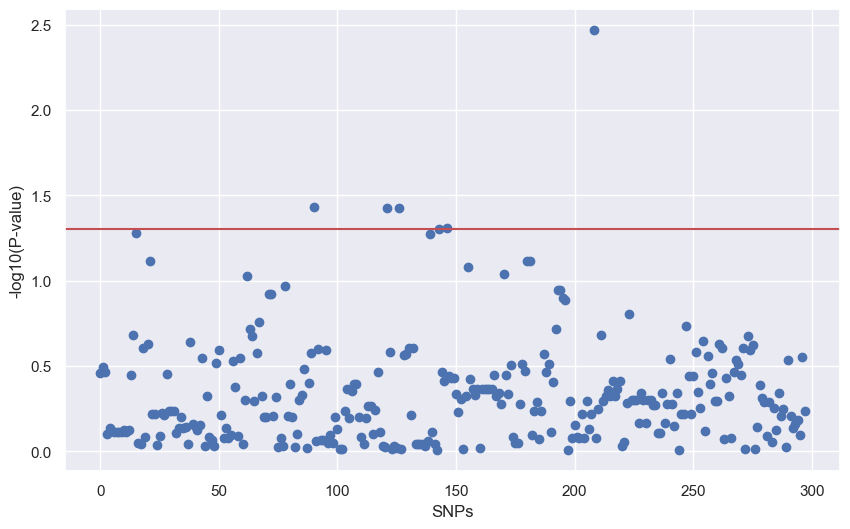

In [56]:
sns.set(font_scale=1)
plt.figure(figsize=(10, 6))
plt.scatter(results_df.index, -np.log10(results_df['P']))
plt.axhline(y=-np.log10(0.05), color='r', linestyle='-') 
plt.xlabel('SNPs')
plt.ylabel('-log10(P-value)')
plt.show()

### Step2: Randomly sample half of the remaining 20% of individuals. With these people, run the PRS pipeline with several p-value thresholds: 1, 0.05, 0.01, 0.001, and 0.00001. Correlate the predicted value of gene expression with the true value. Pick the p-value threshold that maximizes the prediction R2

In [57]:
#creating validation and test set
test1, test2 = train_test_split(test, test_size=0.5, random_state=42)

In [58]:
pd.DataFrame(test1).to_csv("test1_ids.txt", sep=" ", index=False, header=False)
pd.DataFrame(test2).to_csv("test2_ids.txt", sep=" ", index=False, header=False)

`./plink2 --bfile ./LDREF/1000G.EUR.12 --freq --out allele_freqs`

Create bfiles for the validation and test set

Validation Set: 

`./plink2 --bfile ./LDREF/1000G.EUR.12 --extract bed1 my_coord_12.txt --keep test1_ids.txt --out 1000G.EUR.12.test.LAG3 --make-bed`

Test Set:

`./plink2 --bfile ./LDREF/1000G.EUR.12 --extract bed1 my_coord_12.txt --keep test2_ids.txt --out 1000G.EUR.12.test2.LAG3 --make-bed`

In [59]:
!awk '{sub(/_.*/, "", $1); print}' 1000G.EUR.LAG3_sumstats.txt > 1000G.EUR.LAG3_sumstats_clean.txt

In [60]:
#clean up the id of the SNP column to remove the allele
splitted = results_df['SNP'].str.split('_')

In [61]:
results_df['SNP'] = splitted.apply(lambda x: x[0])
results_df['A1'] = splitted.apply(lambda x: x[1])

In [62]:
p_thresholds = [1, 0.05, 0.01, 0.001, 0.00001]
r2s = [0.1, 0.2, 0.5, 0.8]
grid_search = []

for p in p_thresholds:
    for r2 in r2s:
        command1= [
            './plink2',
            '--bfile', '1000G.EUR.12.LAG3',
            '--clump-p1', f'{p}',
            '--clump-r2', f'{r2}',
            '--clump-kb', '500',
            '--clump', '1000G.EUR.LAG3_sumstats_clean.txt', 
            '--clump-snp-field', 'SNP', 
            '--clump-field', 'P',
            '--out', '1000G_eur_train_lag3']
        try:
            result = subprocess.run(command1, check=True, capture_output=True, text=True)
            #print(result.stdout)
        except subprocess.CalledProcessError as e:
            #print(result.stdout)
            continue

        !awk 'NR!=1{print $3}' 1000G_eur_train_lag3.clumps > PRS.SNPs.lag3

        command2 = [
            './plink2', 
            '--bfile',
            '1000G.EUR.12.LAG3',
            '--extract', 'PRS.SNPs.lag3', 
            '--make-bed',
            '--out', '1000G_eur_PRS_lag3'
        ]
        try:
            result = subprocess.run(command2, check=True, capture_output=True, text=True)
        except subprocess.CalledProcessError as e:
            continue


        gene='lag3'
        snp_file = f"PRS.SNPs.{gene}"
        y = pd.read_csv(snp_file, header=None, sep="\t")
        y = y[y[0].str.len() > 0][0].tolist()
        m = results_df['SNP'].isin(y)
        score = pd.DataFrame({
            'SNP': results_df['SNP'][m],
            'A1': results_df['A1'][m],
            'BETA': results_df['beta_1'][m]
        })

        score.to_csv(f"lag3_score_file.txt", index=False, header=False, sep="\t", quoting=3)

        command3 = [
            './plink2', '--bfile', '1000G.EUR.12.test.LAG3',
            '--out', 'PRS_test_lag3',
            '--score', 'lag3_score_file.txt', '1', '2', '3',
            '--read-freq', 'allele_freqs.afreq']
        try:
            result = subprocess.run(command3, check=True)
        except subprocess.CalledProcessError as e:
            continue
        
        score = pd.read_csv('PRS_test_lag3.sscore', delim_whitespace=True)
        el = expression_df[expression_df['TargetID'].str.split('.').apply(lambda x: x[0]) == gene_id.values[0]].iloc[:,4:].transpose()
        common = el.index.intersection(test1[0])
        exp = el.loc[common]
        merged = score.merge(exp, left_on = 'IID', right_index=True)
        cor = merged['SCORE1_AVG'].corr(merged[23621]) ** 2
        grid_search.append([p,r2, cor])

PLINK v2.0.0-a.6 M1 (14 Oct 2024)                  cog-genomics.org/plink/2.0/
(C) 2005-2024 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to PRS_test_lag3.log.
Options in effect:
  --bfile 1000G.EUR.12.test.LAG3
  --out PRS_test_lag3
  --read-freq allele_freqs.afreq
  --score lag3_score_file.txt 1 2 3

Start time: Mon Nov  4 20:00:56 2024
8192 MiB RAM detected; reserving 4096 MiB for main workspace.
Using up to 8 compute threads.
49 samples (0 females, 0 males, 49 ambiguous; 49 founders) loaded from
1000G.EUR.12.test.LAG3.fam.
298 variants loaded from 1000G.EUR.12.test.LAG3.bim.
Note: No phenotype data present.
--read-freq: PLINK 2 --freq file detected.
--read-freq: Frequencies for 298 variants loaded.
--score: 57 variants processed.
--score: Results written to PRS_test_lag3.sscore .
End time: Mon Nov  4 20:00:56 2024


codes, and/or zero observations.


PLINK v2.0.0-a.6 M1 (14 Oct 2024)                  cog-genomics.org/plink/2.0/
(C) 2005-2024 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to PRS_test_lag3.log.
Options in effect:
  --bfile 1000G.EUR.12.test.LAG3
  --out PRS_test_lag3
  --read-freq allele_freqs.afreq
  --score lag3_score_file.txt 1 2 3

Start time: Mon Nov  4 20:00:56 2024
8192 MiB RAM detected; reserving 4096 MiB for main workspace.
Using up to 8 compute threads.
49 samples (0 females, 0 males, 49 ambiguous; 49 founders) loaded from
1000G.EUR.12.test.LAG3.fam.
298 variants loaded from 1000G.EUR.12.test.LAG3.bim.
Note: No phenotype data present.
--read-freq: PLINK 2 --freq file detected.
--read-freq: Frequencies for 298 variants loaded.
--score: 68 variants processed.
--score: Results written to PRS_test_lag3.sscore .
End time: Mon Nov  4 20:00:56 2024
PLINK v2.0.0-a.6 M1 (14 Oct 2024)                  cog-genomics.org/plink/2.0/
(C) 2005-2024 Shaun Purcell, Christopher Chang   GNU General Pu

codes, and/or zero observations.
codes, and/or zero observations.


PLINK v2.0.0-a.6 M1 (14 Oct 2024)                  cog-genomics.org/plink/2.0/
(C) 2005-2024 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to PRS_test_lag3.log.
Options in effect:
  --bfile 1000G.EUR.12.test.LAG3
  --out PRS_test_lag3
  --read-freq allele_freqs.afreq
  --score lag3_score_file.txt 1 2 3

Start time: Mon Nov  4 20:00:56 2024
8192 MiB RAM detected; reserving 4096 MiB for main workspace.
Using up to 8 compute threads.
49 samples (0 females, 0 males, 49 ambiguous; 49 founders) loaded from
1000G.EUR.12.test.LAG3.fam.
298 variants loaded from 1000G.EUR.12.test.LAG3.bim.
Note: No phenotype data present.
--read-freq: PLINK 2 --freq file detected.
--read-freq: Frequencies for 298 variants loaded.
--score: 142 variants processed.
--score: Results written to PRS_test_lag3.sscore .
End time: Mon Nov  4 20:00:56 2024
PLINK v2.0.0-a.6 M1 (14 Oct 2024)                  cog-genomics.org/plink/2.0/
(C) 2005-2024 Shaun Purcell, Christopher Chang   GNU General P

codes, and/or zero observations.
codes, and/or zero observations.


PLINK v2.0.0-a.6 M1 (14 Oct 2024)                  cog-genomics.org/plink/2.0/
(C) 2005-2024 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to PRS_test_lag3.log.
Options in effect:
  --bfile 1000G.EUR.12.test.LAG3
  --out PRS_test_lag3
  --read-freq allele_freqs.afreq
  --score lag3_score_file.txt 1 2 3

Start time: Mon Nov  4 20:00:57 2024
8192 MiB RAM detected; reserving 4096 MiB for main workspace.
Using up to 8 compute threads.
49 samples (0 females, 0 males, 49 ambiguous; 49 founders) loaded from
1000G.EUR.12.test.LAG3.fam.
298 variants loaded from 1000G.EUR.12.test.LAG3.bim.
Note: No phenotype data present.
--read-freq: PLINK 2 --freq file detected.
--read-freq: Frequencies for 298 variants loaded.
--score: 3 variants processed.
--score: Results written to PRS_test_lag3.sscore .
End time: Mon Nov  4 20:00:57 2024
PLINK v2.0.0-a.6 M1 (14 Oct 2024)                  cog-genomics.org/plink/2.0/
(C) 2005-2024 Shaun Purcell, Christopher Chang   GNU General Pub

codes, and/or zero observations.
codes, and/or zero observations.


PLINK v2.0.0-a.6 M1 (14 Oct 2024)                  cog-genomics.org/plink/2.0/
(C) 2005-2024 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to PRS_test_lag3.log.
Options in effect:
  --bfile 1000G.EUR.12.test.LAG3
  --out PRS_test_lag3
  --read-freq allele_freqs.afreq
  --score lag3_score_file.txt 1 2 3

Start time: Mon Nov  4 20:00:57 2024
8192 MiB RAM detected; reserving 4096 MiB for main workspace.
Using up to 8 compute threads.
49 samples (0 females, 0 males, 49 ambiguous; 49 founders) loaded from
1000G.EUR.12.test.LAG3.fam.
298 variants loaded from 1000G.EUR.12.test.LAG3.bim.
Note: No phenotype data present.
--read-freq: PLINK 2 --freq file detected.
--read-freq: Frequencies for 298 variants loaded.
--score: 3 variants processed.
--score: Results written to PRS_test_lag3.sscore .
End time: Mon Nov  4 20:00:57 2024


codes, and/or zero observations.
codes, and/or zero observations.


PLINK v2.0.0-a.6 M1 (14 Oct 2024)                  cog-genomics.org/plink/2.0/
(C) 2005-2024 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to PRS_test_lag3.log.
Options in effect:
  --bfile 1000G.EUR.12.test.LAG3
  --out PRS_test_lag3
  --read-freq allele_freqs.afreq
  --score lag3_score_file.txt 1 2 3

Start time: Mon Nov  4 20:00:57 2024
8192 MiB RAM detected; reserving 4096 MiB for main workspace.
Using up to 8 compute threads.
49 samples (0 females, 0 males, 49 ambiguous; 49 founders) loaded from
1000G.EUR.12.test.LAG3.fam.
298 variants loaded from 1000G.EUR.12.test.LAG3.bim.
Note: No phenotype data present.
--read-freq: PLINK 2 --freq file detected.
--read-freq: Frequencies for 298 variants loaded.
--score: 1 variant processed.
--score: Results written to PRS_test_lag3.sscore .
End time: Mon Nov  4 20:00:57 2024
PLINK v2.0.0-a.6 M1 (14 Oct 2024)                  cog-genomics.org/plink/2.0/
(C) 2005-2024 Shaun Purcell, Christopher Chang   GNU General Publ

codes, and/or zero observations.
codes, and/or zero observations.


PLINK v2.0.0-a.6 M1 (14 Oct 2024)                  cog-genomics.org/plink/2.0/
(C) 2005-2024 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to PRS_test_lag3.log.
Options in effect:
  --bfile 1000G.EUR.12.test.LAG3
  --out PRS_test_lag3
  --read-freq allele_freqs.afreq
  --score lag3_score_file.txt 1 2 3

Start time: Mon Nov  4 20:00:58 2024
8192 MiB RAM detected; reserving 4096 MiB for main workspace.
Using up to 8 compute threads.
49 samples (0 females, 0 males, 49 ambiguous; 49 founders) loaded from
1000G.EUR.12.test.LAG3.fam.
298 variants loaded from 1000G.EUR.12.test.LAG3.bim.
Note: No phenotype data present.
--read-freq: PLINK 2 --freq file detected.
--read-freq: Frequencies for 298 variants loaded.
--score: 1 variant processed.
--score: Results written to PRS_test_lag3.sscore .
End time: Mon Nov  4 20:00:58 2024


codes, and/or zero observations.
codes, and/or zero observations.


PLINK v2.0.0-a.6 M1 (14 Oct 2024)                  cog-genomics.org/plink/2.0/
(C) 2005-2024 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to PRS_test_lag3.log.
Options in effect:
  --bfile 1000G.EUR.12.test.LAG3
  --out PRS_test_lag3
  --read-freq allele_freqs.afreq
  --score lag3_score_file.txt 1 2 3

Start time: Mon Nov  4 20:00:58 2024
8192 MiB RAM detected; reserving 4096 MiB for main workspace.
Using up to 8 compute threads.
49 samples (0 females, 0 males, 49 ambiguous; 49 founders) loaded from
1000G.EUR.12.test.LAG3.fam.
298 variants loaded from 1000G.EUR.12.test.LAG3.bim.
Note: No phenotype data present.
--read-freq: PLINK 2 --freq file detected.
--read-freq: Frequencies for 298 variants loaded.
--score: 1 variant processed.
--score: Results written to PRS_test_lag3.sscore .
End time: Mon Nov  4 20:00:58 2024
PLINK v2.0.0-a.6 M1 (14 Oct 2024)                  cog-genomics.org/plink/2.0/
(C) 2005-2024 Shaun Purcell, Christopher Chang   GNU General Publ

codes, and/or zero observations.
codes, and/or zero observations.


PLINK v2.0.0-a.6 M1 (14 Oct 2024)                  cog-genomics.org/plink/2.0/
(C) 2005-2024 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to PRS_test_lag3.log.
Options in effect:
  --bfile 1000G.EUR.12.test.LAG3
  --out PRS_test_lag3
  --read-freq allele_freqs.afreq
  --score lag3_score_file.txt 1 2 3

Start time: Mon Nov  4 20:00:58 2024
8192 MiB RAM detected; reserving 4096 MiB for main workspace.
Using up to 8 compute threads.
49 samples (0 females, 0 males, 49 ambiguous; 49 founders) loaded from
1000G.EUR.12.test.LAG3.fam.
298 variants loaded from 1000G.EUR.12.test.LAG3.bim.
Note: No phenotype data present.
--read-freq: PLINK 2 --freq file detected.
--read-freq: Frequencies for 298 variants loaded.
--score: 1 variant processed.
--score: Results written to PRS_test_lag3.sscore .
End time: Mon Nov  4 20:00:58 2024
PLINK v2.0.0-a.6 M1 (14 Oct 2024)                  cog-genomics.org/plink/2.0/
(C) 2005-2024 Shaun Purcell, Christopher Chang   GNU General Publ

codes, and/or zero observations.
codes, and/or zero observations.


PLINK v2.0.0-a.6 M1 (14 Oct 2024)                  cog-genomics.org/plink/2.0/
(C) 2005-2024 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to PRS_test_lag3.log.
Options in effect:
  --bfile 1000G.EUR.12.test.LAG3
  --out PRS_test_lag3
  --read-freq allele_freqs.afreq
  --score lag3_score_file.txt 1 2 3

Start time: Mon Nov  4 20:00:59 2024
8192 MiB RAM detected; reserving 4096 MiB for main workspace.
Using up to 8 compute threads.
49 samples (0 females, 0 males, 49 ambiguous; 49 founders) loaded from
1000G.EUR.12.test.LAG3.fam.
298 variants loaded from 1000G.EUR.12.test.LAG3.bim.
Note: No phenotype data present.
--read-freq: PLINK 2 --freq file detected.
--read-freq: Frequencies for 298 variants loaded.
--score: 1 variant processed.
--score: Results written to PRS_test_lag3.sscore .
End time: Mon Nov  4 20:00:59 2024
PLINK v2.0.0-a.6 M1 (14 Oct 2024)                  cog-genomics.org/plink/2.0/
(C) 2005-2024 Shaun Purcell, Christopher Chang   GNU General Publ

codes, and/or zero observations.
codes, and/or zero observations.


PLINK v2.0.0-a.6 M1 (14 Oct 2024)                  cog-genomics.org/plink/2.0/
(C) 2005-2024 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to PRS_test_lag3.log.
Options in effect:
  --bfile 1000G.EUR.12.test.LAG3
  --out PRS_test_lag3
  --read-freq allele_freqs.afreq
  --score lag3_score_file.txt 1 2 3

Start time: Mon Nov  4 20:00:59 2024
8192 MiB RAM detected; reserving 4096 MiB for main workspace.
Using up to 8 compute threads.
49 samples (0 females, 0 males, 49 ambiguous; 49 founders) loaded from
1000G.EUR.12.test.LAG3.fam.
298 variants loaded from 1000G.EUR.12.test.LAG3.bim.
Note: No phenotype data present.
--read-freq: PLINK 2 --freq file detected.
--read-freq: Frequencies for 298 variants loaded.
--score: 1 variant processed.
--score: Results written to PRS_test_lag3.sscore .
End time: Mon Nov  4 20:00:59 2024


codes, and/or zero observations.


In [63]:
#finding the hyperparameters that maximizes the correlation 
grid_df = pd.DataFrame(grid_search, columns=['p', 'r2', 'cor'])
max_id = grid_df['cor'].idxmax()

In [64]:
#saving the best hyperparameters
p = grid_df.loc[2]['p']
r2 = grid_df.loc[2]['r2']

In [65]:
command1= [
    './plink2',
    '--bfile', '1000G.EUR.12.LAG3',
    '--clump-p1', f'{p}', '--clump-r2', f'{r2}',
    '--clump-kb', '500', '--clump', '1000G.EUR.LAG3_sumstats_clean.txt', '--clump-snp-field', 'SNP', '--clump-field', 'P', '--out', '1000G_eur_train_lag3']
try:
    result = subprocess.run(command1, check=True, capture_output=True, text=True)
except subprocess.CalledProcessError as e:
    pass

In [66]:
!awk 'NR!=1{print $3}' 1000G_eur_train_lag3.clumps > PRS.SNPs.lag3

In [67]:
command2 = [
    './plink2', '--bfile',
    '1000G.EUR.12.LAG3','--extract', 'PRS.SNPs.lag3', 
    '--make-bed','--out', '1000G_eur_PRS_lag3']
try:
    result = subprocess.run(command2, check=True, capture_output=True, text=True)
except subprocess.CalledProcessError as e:
    pass

In [68]:
gene='lag3'
snp_file = f"PRS.SNPs.{gene}"
y = pd.read_csv(snp_file, header=None, sep="\t")
y = y[y[0].str.len() > 0][0].tolist()
m = results_df['SNP'].isin(y)
score = pd.DataFrame({
    'SNP': results_df['SNP'][m],
    'A1': results_df['A1'][m],
    'BETA': results_df['beta_1'][m]
    })

score.to_csv(f"lag3_score_file.txt", index=False, header=False, sep="\t", quoting=3)

`./plink2 --bfile 1000G.EUR.12.test2.LAG3 --out PRS_test_lag3 --score lag3_score_file.txt 1 2 3 --read-freq allele_freqs.afreq`

In [ ]:
#do for test data -- ran in plink terminal
command = ['./plink2', 
           '--bfile', 
           '1000G.EUR.12.test.LAG3',
           '--out', 'PRS_test_lag3',
           '--score', 
           'lag3_score_file.txt', '1', '2', '3',
            '--read-freq', 'allele_freqs.afreq']

try:
    result = subprocess.run(command3, check=True)
except subprocess.CalledProcessError as e:
    pass

In [69]:
score = pd.read_csv('PRS_test_lag3.sscore', delim_whitespace=True)
el = expression_df[expression_df['TargetID'].str.split('.').apply(lambda x: x[0]) == gene_id.values[0]].iloc[:,4:].transpose()
common = el.index.intersection(test2[0])
exp = el.loc[common]
merged = score.merge(exp, left_on = 'IID', right_index=True)
cor = merged['SCORE1_AVG'].corr(merged[23621]) ** 2
cor

0.01922492639139658

### Summary of all plink commands

Performing clumping

`./plink2 --bfile 1000G.EUR.12.LAG3 --clump-p1 0.1 --clump-r2 0.5 --clump-kb 500 --clump 1000G.EUR.LAG3_sumstats_clean.txt --clump-snp-field SNP --clump-field P --out 1000G_eur_train_lag3`

Extract SNPs from clumped output

`awk 'NR!=1{print $3}' 1000G_eur_train_lag3.clumps > PRS.SNPs.lag3`

`./plink2 --bfile 1000G.EUR.12.LAG3 --extract PRS.SNPs.lag3 --make-bed --out 1000G_eur_PRS_lag3`

Create bfiles for the validation and test set

Validation Set: 

`./plink2 --bfile ./LDREF/1000G.EUR.12 --extract bed1 my_coord_12.txt --keep test1_ids.txt --out 1000G.EUR.12.test.LAG3 --make-bed`

Test Set: 

`./plink2 --bfile ./LDREF/1000G.EUR.12 --extract bed1 my_coord_12.txt --keep test2_ids.txt --out 1000G.EUR.12.test2.LAG3 --make-bed`

Make plink files for validation set + score people in the validation set:

`./plink2 --bfile 1000G.EUR.12.test.LAG3 --out PRS_test_lag3 --score lag3_score_file.txt 1 2 3 --read-freq allele_freqs.afreq`

Make plink files for test set + score people in the test set

`./plink2 --bfile 1000G.EUR.12.test2.LAG3 --out PRS_test_lag3 --score lag3_score_file.txt 1 2 3 --read-freq allele_freqs.afreq`

# Week5: Integrating 23andme data with PRS analysis and 1000 Genomes predictions

`awk 'BEGIN { OFS="\t"; print "#CHROM", "POS", "ID", "REF", "ALT" }
$0 !~ /^#/ {
    chrom=$2;
    pos=$3;
    id=$1;
    ref=substr($4, 1, 1);
    alt=substr($4, 2, 1);
    if (alt == "") alt = "."; # For homozygous sites
    print chrom, pos, id, ref, alt;
}' tiffany.txt > genome_formatted.tab`

`bgzip genome_formatted.tab
tabix -s 1 -b 2 -e 2 genome_formatted.tab.gz`

`./plink2 --bfile 1000G.EUR.12.test.LAG3 --out PRS_test_lag3 --score lag3_score_file.txt 1 2 3`

Convert Tiffany's 23andme txt data into VCF:

bcftools convert --tsv2vcf genome_formatted.tab.gz -f unipAliTrembl.bb -s Tiffany -Ob -o sample.bcf
